In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_excel("data/Retail-Supply-Chain-Sales-Dataset.xlsx")


In [8]:
# Preview the data
print(df.head())
print(df.info())
print(df.describe())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-12-06 2016-12-06    Second Class    DV-13045   
3       4  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   
4       5  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Retail Sales People       Product ID         Category Sub-Category  \
0   Cassandra Brandow  FUR-BO-10

In [9]:
# Check for missing values
print(df.isnull().sum())

Row ID                 0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
Country                0
City                   0
State                  0
Postal Code            0
Region                 0
Retail Sales People    0
Product ID             0
Category               0
Sub-Category           0
Product Name           0
Returned               0
Sales                  0
Quantity               0
Discount               0
Profit                 0
dtype: int64


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Check column name
print(df.columns)

# Plot if column exists
if 'Order Quantity' in df.columns:
    sns.histplot(df['Order Quantity'], bins=30, kde=True)
    plt.title("Distribution of Order Quantity")
    plt.show()
else:
    print("⚠️ Column 'Order Quantity' not found.")


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Retail Sales People', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Returned', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')
⚠️ Column 'Order Quantity' not found.


<Figure size 800x600 with 0 Axes>

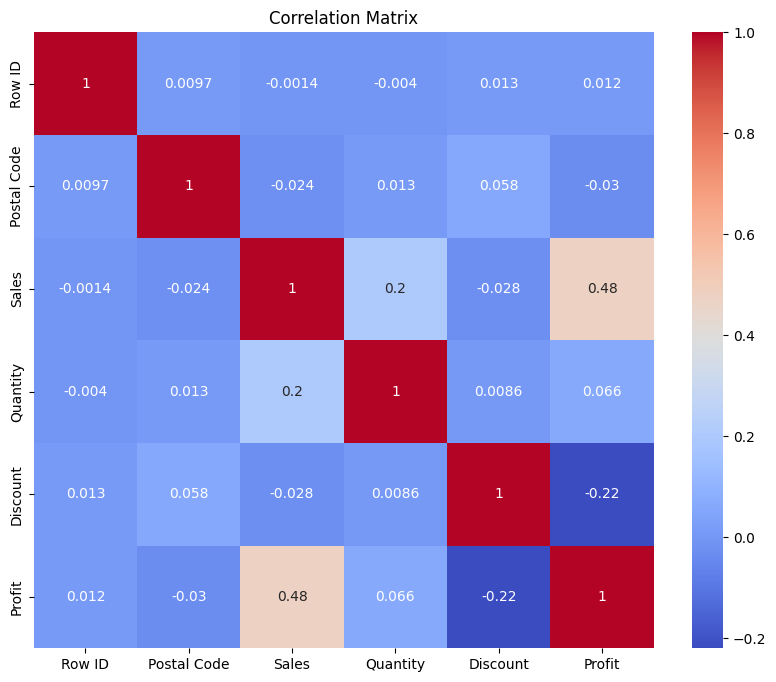

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [18]:
print(df.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Retail Sales People', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Returned', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')


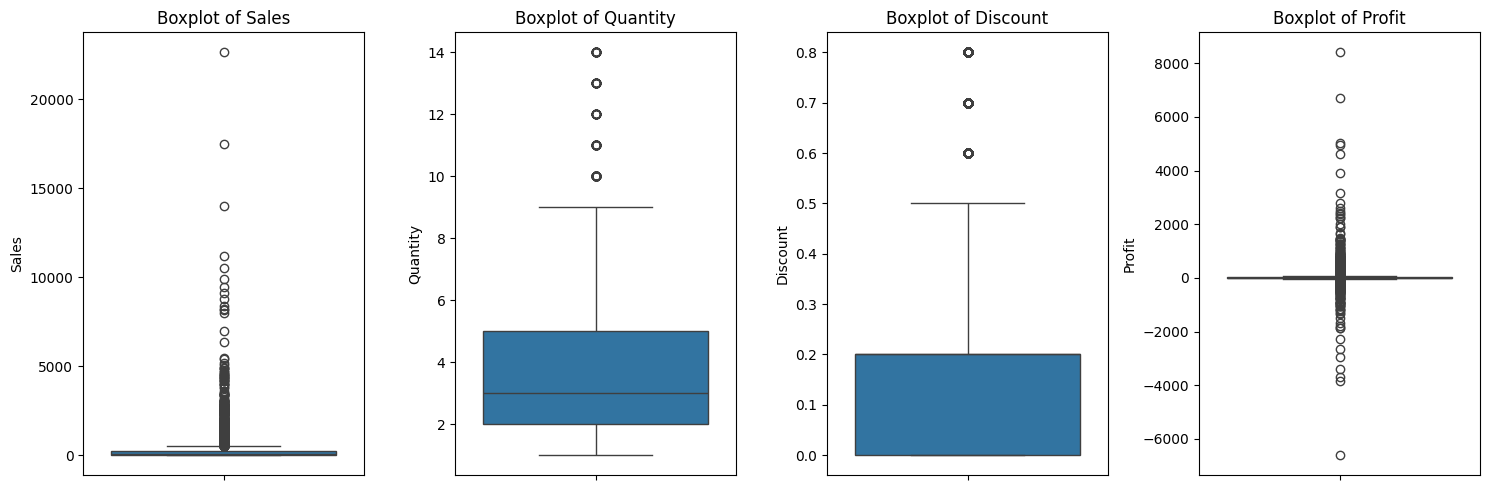

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select actual numeric columns
columns = ['Sales', 'Quantity', 'Discount', 'Profit']

# Plot boxplots
plt.figure(figsize=(15, 5))

for i, col in enumerate(columns):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


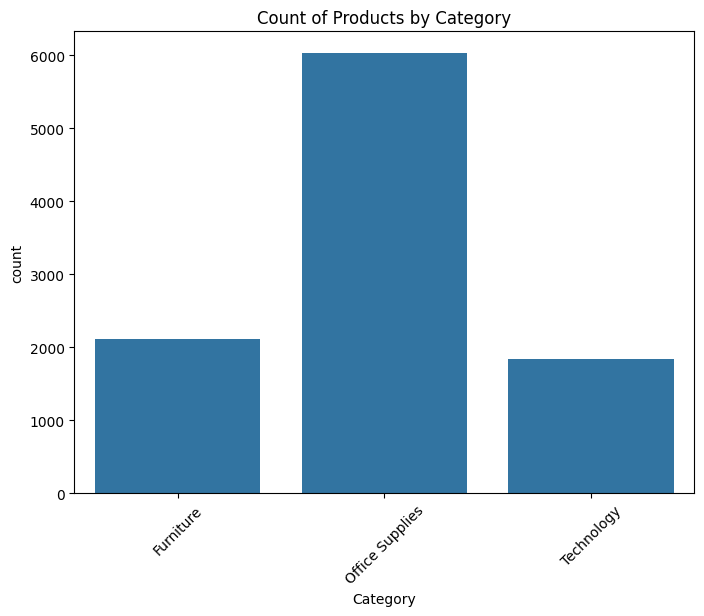

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Category')
plt.title("Count of Products by Category")
plt.xticks(rotation=45)
plt.show()


In [24]:
# Grouping and analyzing data by Category
sales_by_category = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print(sales_by_category)


Category
Office Supplies    22906
Furniture           8028
Technology          6939
Name: Quantity, dtype: int64


In [25]:
sales_by_country = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
print(sales_by_country)


Country
United States    37873
Name: Quantity, dtype: int64
